In [33]:
import numpy as np
import importlib

import pandas as pd

import models.baselines
importlib.reload(models.baselines)
x_train = np.zeros(shape=(2000,203,17))
x_train = np.reshape(x_train,(*x_train.shape,1))
n_classes = 3
model = models.baselines.create_conv_baseline(x_train,n_classes)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 197, 8, 8)         568       
                                                                 
 conv2d_27 (Conv2D)          (None, 197, 8, 8)         72        
                                                                 
 conv1d_39 (Conv1D)          (None, 197, 5, 10)        330       
                                                                 
 flatten_8 (Flatten)         (None, 9850)              0         
                                                                 
 dense_53 (Dense)            (None, 32)                315232    
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                     

In [69]:
from _preprocessing import LinearCoefficientTargetGenerator
import pandas as pd
df = pd.read_csv(r'D:\Egyetem\7.Semester\CryptoPredictions\splits\test\btc_prices.csv')
g = LinearCoefficientTargetGenerator('close',5,14,classifier_borders=(-0.2,0.2))
tr = g.fit_transform(df)

In [70]:
tr.head(2)

,time,high,low,open,close,BTCTradedToUSD,USDTradedToBTC,LinearCoeffTarget_target,LinearCoeffTarget_feature
0,2022-01-01,47950.29,46196.03,46197.31,47737.35,16697.92,7.867300e+08,<NA>,NaN
1,2022-01-02,47979.26,46666.18,47737.35,47306.41,13025.66,6.154534e+08,<NA>,NaN


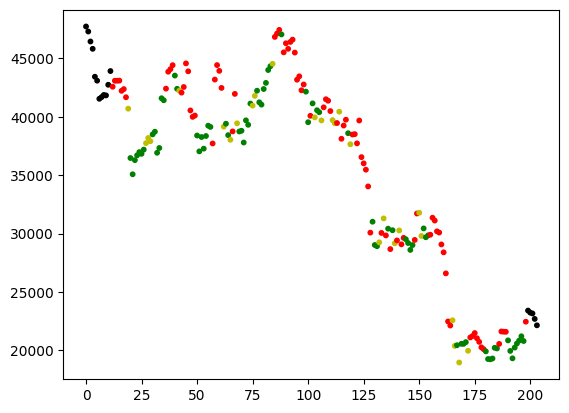

In [71]:
import matplotlib.pyplot as plt
color_map = {
    0  : 'r',
    1 : 'y',
    2:'g',
    pd.NA: 'black'
}
colors = [color_map[value] for value in df['LinearCoeffTarget_target']]
plt.scatter(range(len(df)),df['close'],s=10,c=colors)

In [55]:
df.iloc[160:180]

,time,high,low,open,close,BTCTradedToUSD,USDTradedToBTC,LinearCoeffTarget_target,LinearCoeffTarget_feature
160,2022-06-10,30336.90,28839.92,30082.94,29067.38,38461.60,1.133050e+09,0,0.084124
161,2022-06-11,29414.37,28105.18,29067.38,28389.49,24313.37,6.969862e+08,0,-0.126614
162,2022-06-12,28519.32,26570.67,28389.49,26587.35,38522.37,1.060465e+09,0,-0.070533
163,2022-06-13,26871.60,21976.15,26587.35,22471.59,169741.38,4.089411e+09,0,-0.136991
164,2022-06-14,23214.28,20837.64,22471.59,22118.37,93509.58,2.063909e+09,0,-0.176164
165,2022-06-15,22743.84,20083.90,22118.37,22566.73,118629.55,2.516137e+09,1,-0.272724
166,2022-06-16,22961.17,20209.17,22566.73,20372.85,62443.29,1.326877e+09,1,-0.296176
167,2022-06-17,21330.50,20221.24,20372.85,20432.26,63610.58,1.312457e+09,2,-0.302321
168,2022-06-18,20722.69,17600.75,20432.26,18954.25,100138.03,1.898531e+09,1,-0.342782
169,2022-06-19,20776.87,17936.00,18954.25,20553.48,61181.89,1.190970e+09,1,-0.367264


In [68]:

from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept=False)
x = df['close'].iloc[165:165+5]
scaled = (x.to_numpy() - x.iloc[0]) / np.std(x)
lm.fit(np.array(list(range(len(scaled)))).reshape(-1, 1), scaled)
lm.coef_

array([-0.73249835])

<AxesSubplot:>

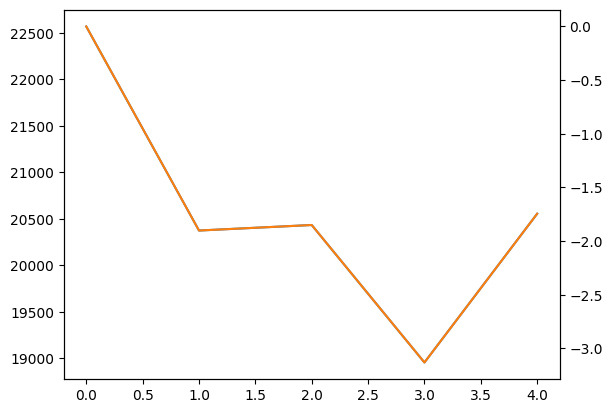

In [72]:
df['close'].iloc[165:165+5].reset_index(drop=True).plot()
pd.Series((x.to_numpy() - x.iloc[0]) / np.std(x)).plot(secondary_y=True)

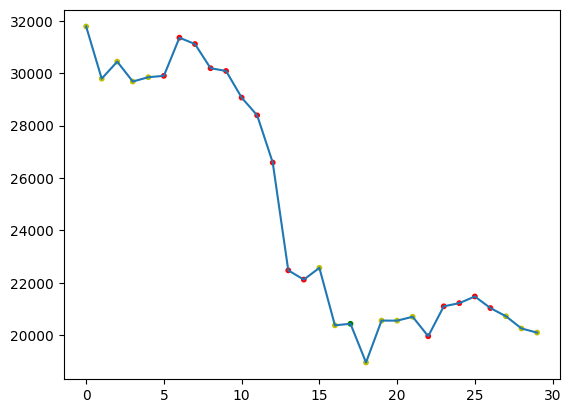

In [67]:
df['close'].iloc[150:180].reset_index(drop=True).plot()
colors = [color_map[value] for value in df['LinearCoeffTarget_target'].iloc[150:180]]
plt.scatter(range(len(df.iloc[150:180])),df['close'].iloc[150:180],s=10,c=colors)